In [ ]:
import pandas as pd
import seaborn as sns

# Data preparation

In [2]:
df = pd.read_csv('data/course_lead_scoring.csv')
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [3]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [4]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [5]:
df.converted.dtype

dtype('int64')

In [6]:
cat_vars = []
num_vars = []

for col in df.columns:
    if str(df[col].dtype) == 'object':
        cat_vars.append(col)
    else:
        num_vars.append(col)

In [7]:
target = 'converted'
num_vars.remove(target)

In [8]:
print(cat_vars)
print(num_vars)

['lead_source', 'industry', 'employment_status', 'location']
['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']


In [9]:
for col in cat_vars:
    df.loc[df[col].isna(), col] = 'NA'

for col in num_vars:
    df.loc[df[col].isna(), col] = 0

In [10]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

# Question 1

In [11]:
df['industry'].mode()

0    retail
Name: industry, dtype: object

# Question 2

In [12]:
corr = df[num_vars].corr()
display(corr)

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


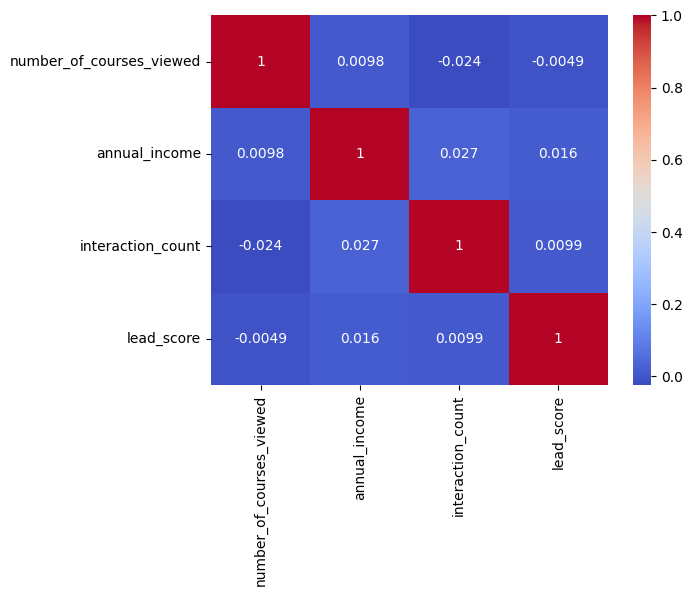

In [13]:
sns.heatmap(corr, annot=True, cmap="coolwarm");

# Question 3

In [14]:
from sklearn.model_selection import train_test_split

seed = 42

# df_tmp, df_test = train_test_split(df, test_size=0.2, random_state=seed)
# df_train, df_val = train_test_split(df_tmp, test_size=0.25, random_state=seed)

df_train, df_tmp = train_test_split(df, test_size=0.4, random_state=seed)
df_val, df_test = train_test_split(df_tmp, test_size=0.5, random_state=seed)

y_train = df_train[target]
y_val = df_val[target]
y_test = df_test[target]

del df_tmp

# del df_train[target]
# del df_val[target]
# del df_test[target]

for dat in [df_train, df_val, df_test]:
    dat.drop(columns=target, inplace=True)

In [15]:
print(df_train.shape[0])
print(df_val.shape[0])
print(df_test.shape[0])

877
292
293


In [16]:
from sklearn.metrics import mutual_info_score

for var in cat_vars:
    print(f'{var}: {round(mutual_info_score(y_train, df_train[var]), 2)}')

lead_source: 0.03
industry: 0.02
employment_status: 0.02
location: 0.0


In [17]:
for var in num_vars:
    print(f'{var}: {round(df_train[var].corr(y_train), 2)}')

number_of_courses_viewed: 0.45
annual_income: 0.0
interaction_count: 0.37
lead_score: 0.22


# Question 4

In [18]:
df[cat_vars].nunique()

lead_source          6
industry             8
employment_status    5
location             8
dtype: int64

In [19]:
global_mean = df[target].mean()

for var in cat_vars:
    res = df.groupby(var)[target].agg(['count', 'mean'])
    res['diff'] = res['mean'] - global_mean
    res['risk'] = res['mean'] / global_mean
    display(res)

,count,mean,diff,risk
lead_source,,,,
NA,128,0.671875,0.052860,1.085394
events,250,0.596000,-0.023015,0.962820
organic_search,282,0.617021,-0.001994,0.996779
paid_ads,264,0.446970,-0.172045,0.722066
referral,260,0.807692,0.188677,1.304802
social_media,278,0.604317,-0.014699,0.976255


,count,mean,diff,risk
industry,,,,
NA,134,0.559701,-0.059314,0.904181
education,187,0.748663,0.129648,1.209442
finance,200,0.595000,-0.024015,0.961204
healthcare,187,0.604278,-0.014737,0.976193
manufacturing,174,0.666667,0.047652,1.076980
other,198,0.611111,-0.007904,0.987231
retail,203,0.586207,-0.032808,0.946999
technology,179,0.569832,-0.049183,0.920547


,count,mean,diff,risk
employment_status,,,,
NA,100,0.560000,-0.059015,0.904663
employed,328,0.689024,0.070009,1.113098
self_employed,352,0.653409,0.034394,1.055563
student,348,0.652299,0.033284,1.053769
unemployed,334,0.497006,-0.122009,0.802898


,count,mean,diff,risk
location,,,,
NA,63,0.698413,0.079398,1.128264
africa,188,0.601064,-0.017951,0.971000
asia,195,0.620513,0.001498,1.002420
australia,185,0.605405,-0.013610,0.978014
europe,216,0.652778,0.033763,1.054543
middle_east,198,0.631313,0.012298,1.019867
north_america,225,0.595556,-0.023459,0.962102
south_america,192,0.598958,-0.020057,0.967599


In [20]:
from sklearn.feature_extraction import DictVectorizer

# dicts = df_train[cat_vars].to_dict(orient='records')
dicts = df_train.to_dict(orient='records')
dicts

[{'lead_source': 'referral',
  'industry': 'finance',
  'number_of_courses_viewed': 1,
  'annual_income': 61705.0,
  'employment_status': 'unemployed',
  'location': 'south_america',
  'interaction_count': 4,
  'lead_score': 0.65},
 {'lead_source': 'referral',
  'industry': 'education',
  'number_of_courses_viewed': 1,
  'annual_income': 55199.0,
  'employment_status': 'employed',
  'location': 'south_america',
  'interaction_count': 4,
  'lead_score': 0.09},
 {'lead_source': 'referral',
  'industry': 'retail',
  'number_of_courses_viewed': 1,
  'annual_income': 40841.0,
  'employment_status': 'self_employed',
  'location': 'africa',
  'interaction_count': 4,
  'lead_score': 0.61},
 {'lead_source': 'referral',
  'industry': 'other',
  'number_of_courses_viewed': 1,
  'annual_income': 28242.0,
  'employment_status': 'employed',
  'location': 'middle_east',
  'interaction_count': 3,
  'lead_score': 0.84},
 {'lead_source': 'events',
  'industry': 'retail',
  'number_of_courses_viewed': 0,

In [21]:
dv = DictVectorizer(sparse=False)
# dv.fit(dicts)
# # print(dv.get_feature_names_out())
# dv.transform(dicts)

X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))
# X_test = dv.transform(df_test.to_dict(orient='records'))

In [22]:
# Alternative one-hot encoding

X_train = pd.get_dummies(df_train, drop_first=False).astype(int)
X_val = pd.get_dummies(df_val, drop_first=False).astype(int)


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
# model.predict(X_train)
y_pred = model.predict_proba(X_val)[:, 1]

# y_pred > 0.5

In [24]:
model.score(X_val, y_val)

0.7431506849315068

In [25]:
# Accuracy

(y_val == (y_pred > 0.5)).mean()

np.float64(0.7431506849315068)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred > 0.5, y_val)

0.7431506849315068

In [27]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_pred > 0.5, y_val)

0.7260330578512396

# Question 5

In [28]:
print(cat_vars)
print(num_vars)

['lead_source', 'industry', 'employment_status', 'location']
['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']


In [29]:
def train_model(vars):
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]

    return (y_val == (y_pred > 0.5)).mean()

acc = train_model(cat_vars + num_vars)
acc

np.float64(0.7431506849315068)

In [30]:
vars = cat_vars + num_vars

for i in range(len(vars)):
    removed = vars.pop(i)
    print(f'{removed}: {round((acc - train_model(vars)), 150)}')
    vars.insert(i, removed)

lead_source: 0.0
industry: 0.0
employment_status: 0.0
location: 0.0
number_of_courses_viewed: 0.0
annual_income: 0.0
interaction_count: 0.0
lead_score: 0.0


# Question 6

In [31]:
for c in [0.01, 0.1, 1, 10, 100]:
    model_reg = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model_reg.fit(X_train, y_train)
    y_pred_reg = model_reg.predict_proba(X_val)[:, 1]

    # print((y_val == (y_pred_reg > 0.5)).mean())
    print(f'{c}: {round(model_reg.score(X_val, y_val), 5)}')

0.01: 0.73973
0.1: 0.73973
1: 0.74315
10: 0.74315
100: 0.74315
